In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import friedmanchisquare, mannwhitneyu, shapiro

##### Read the data file

In [2]:
catch=pd.read_csv('EGOALLO_PROTOCOL_OUTCOMES_AND_PERFORMANCES.csv')
catch.head()

,rat,session_nr,performance,catch_session,catch_nr,outcome
0,1,1,53.3,0,NaN,NaN
1,1,2,40.0,0,NaN,NaN
2,1,3,80.0,1,1.0,E
3,1,4,33.3,0,NaN,NaN
4,1,5,53.3,0,NaN,NaN


#### Proportion of allocentric vs. egocentric choices?

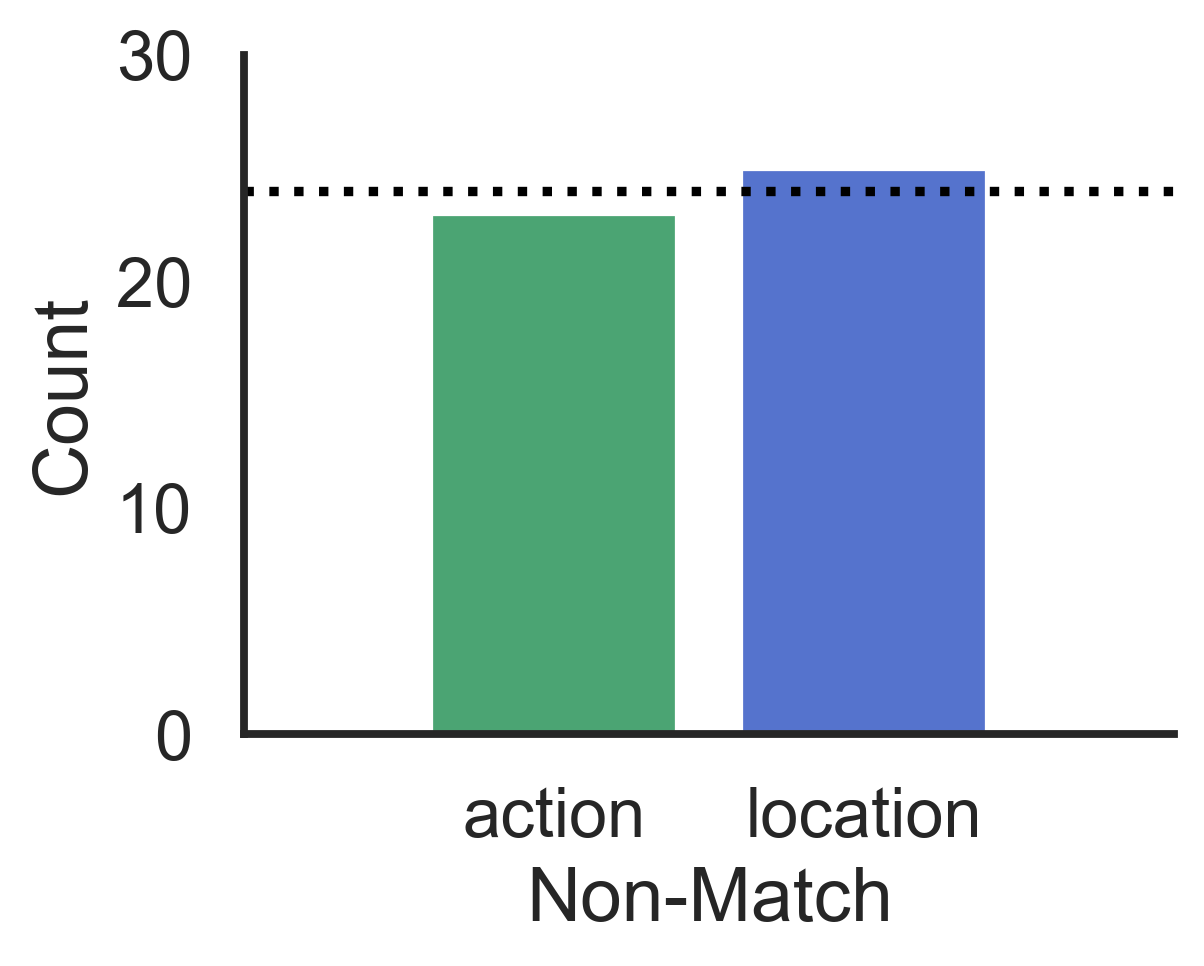

In [3]:
sns.set(context='talk', style='white')
plt.figure(dpi=300, figsize=(4,3))
g=sns.countplot(data=catch, x='outcome', palette=['mediumseagreen', 'royalblue'], order=['E','A'])
g.set(xlim=[-1,2], xlabel='Non-Match', xticklabels=['action', 'location'],
      ylim=[0,30], ylabel='Count') #title="Non-match to action vs. Non-match to location\n")
plt.axhline(24, linestyle=':', color='black')
sns.despine()
plt.savefig('action_vs_location_proportions.svg')

In [5]:
from scipy.stats import chisquare
chisquare([23,25], f_exp=[24,24])

Power_divergenceResult(statistic=0.08333333333333333, pvalue=0.7728299926844475)

###### As expected, the chi-squared test demonstrated that the deviations to the expected frequencies (24 counts per category) are not significant. This suggests that rats do not show a preference for non-matching to location or action. 

##### What is the proportion of non matches to location in the first trial?

In [6]:
first_catch=catch[catch.catch_nr==1]

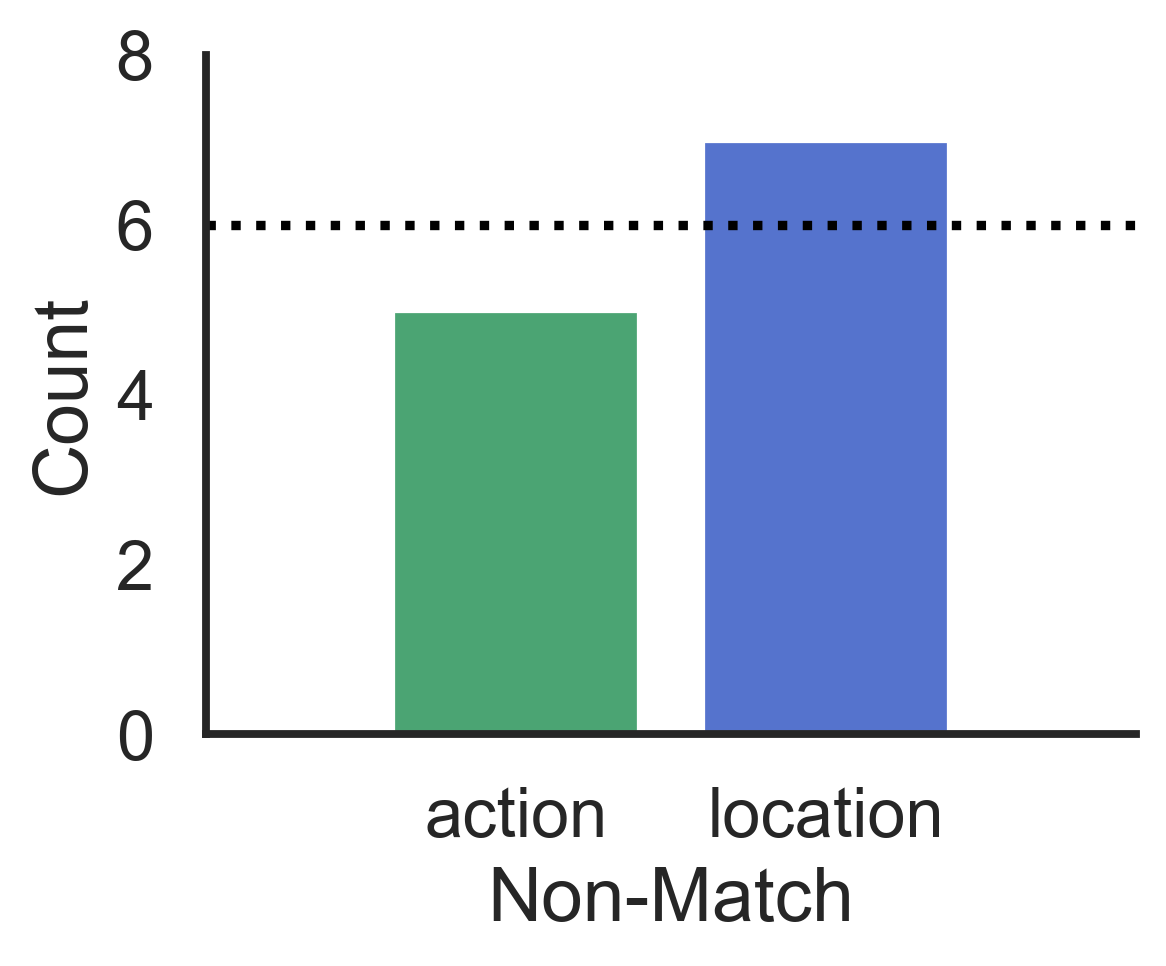

In [7]:
plt.figure(dpi=300, figsize=(4,3))
sns.set(style='white', context='talk')
g=sns.countplot(data=first_catch, x='outcome', order=['E','A'],
                palette=['mediumseagreen', 'royalblue'])
g.set(xlim=[-1,2], xlabel='Non-Match', xticklabels=['action', 'location'],
      ylim=[0,8], ylabel='Count')
      #title="Non-match to action vs. Non-match to location in first catch\n")
plt.axhline(6, linestyle=':', color='black')
sns.despine()
plt.savefig('1s_trial_action_vs_location_proportions.svg')

In [8]:
chisquare([5,7], f_exp=[6,6])

Power_divergenceResult(statistic=0.3333333333333333, pvalue=0.5637028616507731)

###### When looking specifically for the first catch trial, we also do not find a significant preference for one of the strategies.

#### Calculate the probability of using an allo strategy subdivided by catch trial number

In [21]:
catch_by_outcome=catch.groupby(['catch_nr'])['outcome'].value_counts().reset_index('catch_nr')
catch_by_outcome = catch_by_outcome.drop('E')

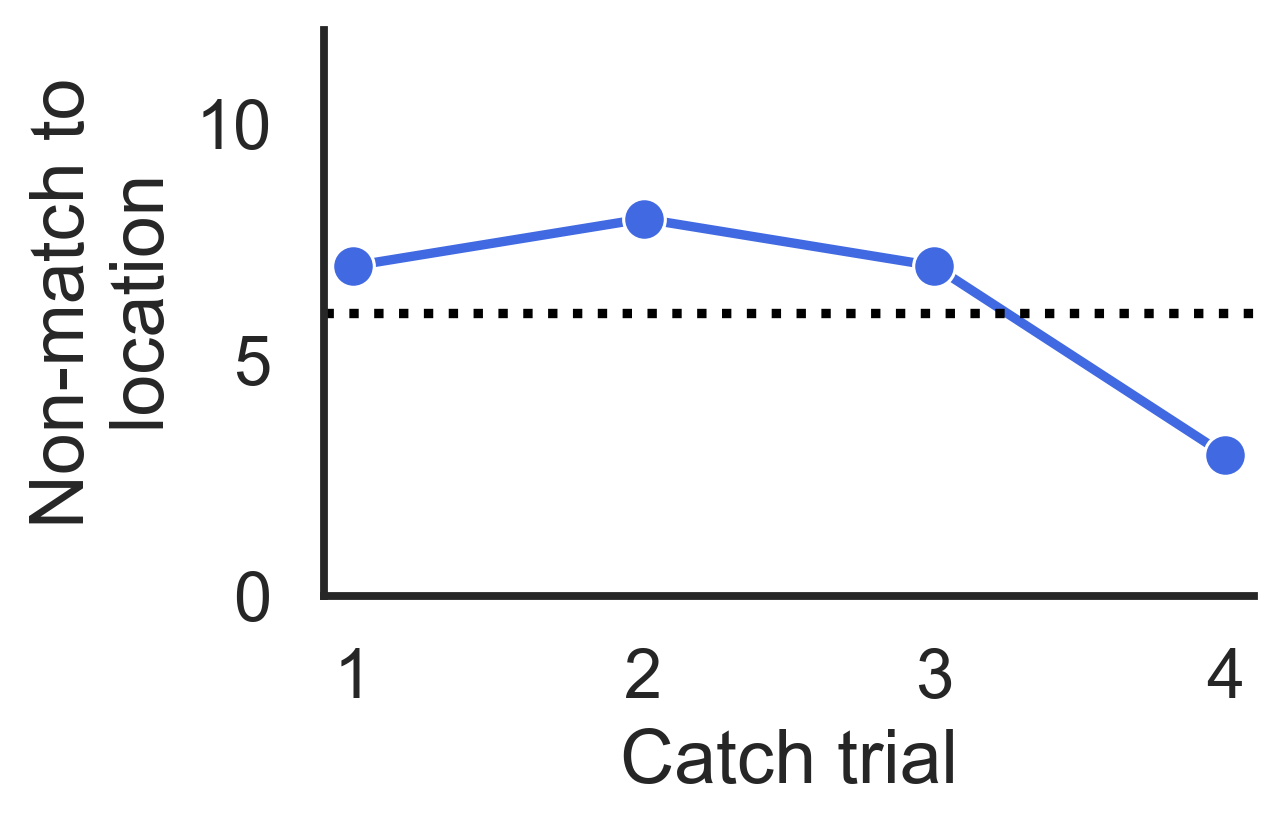

In [22]:
sns.set(context='talk')
plt.figure(dpi=300,figsize=(4,2.5))
sns.set(style='white', context='talk')

g=sns.lineplot(data=catch_by_outcome, x='catch_nr',y='outcome', 
            color='royalblue', markersize=10, marker='o')

g.set(xlim=[.9,4.1], ylim=[0,12], 
      xlabel='Catch trial', 
      ylabel=' Non-match to\n location', 
      xticks=range(1,5,1))
     #title="Number of non-matches to locations\n")
plt.axhline(6,linestyle=':', color='black')
sns.despine()
plt.savefig('prop_non_match_location_across_catch_trials.svg')

In [23]:
chisquare([7,8,7,3], [6,6,6,6])

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.041666666666666664

###### The deviations to the expected number of non-match to locations for each catch number are not significant

#### What is the prevelence of Allocentric based choices in sequences?

In [24]:
catch['outcome']=catch['outcome'].astype('category')
outcome_counts=catch.groupby(['rat','outcome'])['catch_nr'].count().reset_index('rat').drop('E')
outcome_counts.rename(columns={'catch_nr':'counts'}, inplace=True)

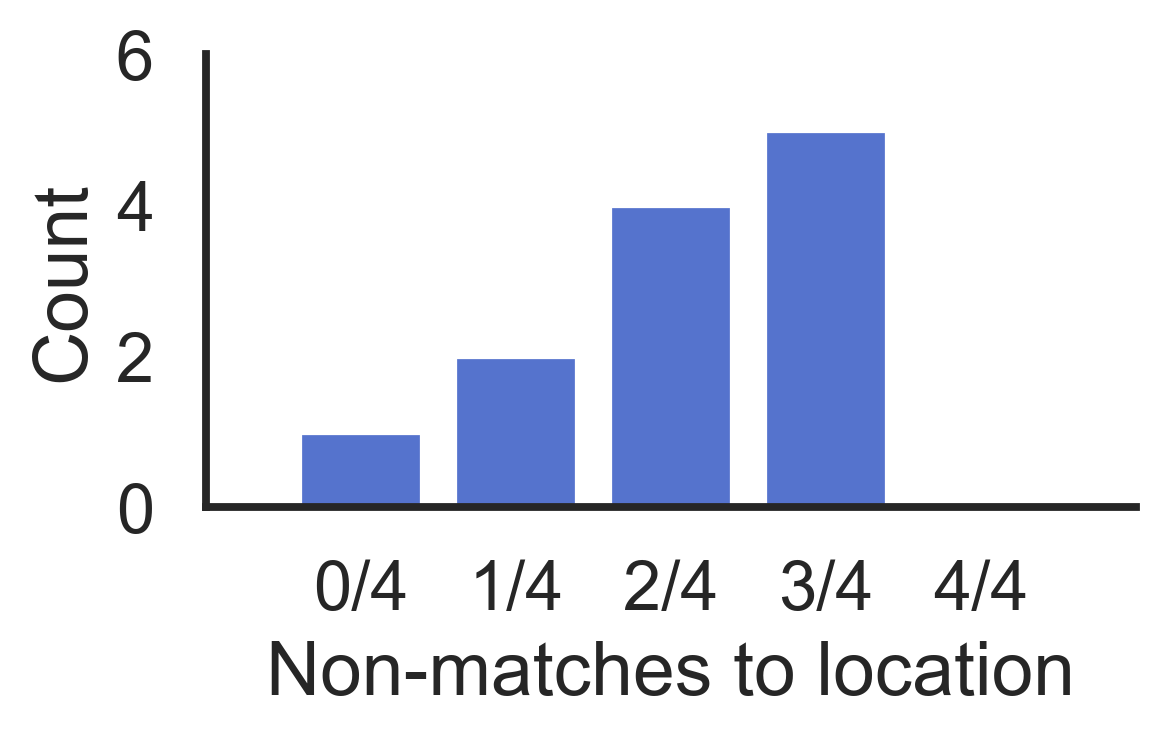

In [29]:
plt.figure(figsize=(4,2), dpi=300)
sns.set(style='white', context='talk')
g=sns.countplot(data=outcome_counts, x='counts', color='royalblue')
g.set(xlim=[-1,5], xticks=range(0,5,1), 
      xticklabels=['0/4', '1/4', '2/4', '3/4', '4/4'],
     ylim=[0,6], ylabel='Count', xlabel='Non-matches to location')
sns.despine()
plt.savefig('non_match_location_in_sequences.svg')

##### Is session number related with the non match choice in the first catch trial?

In [19]:
catch_sessions=catch.dropna()

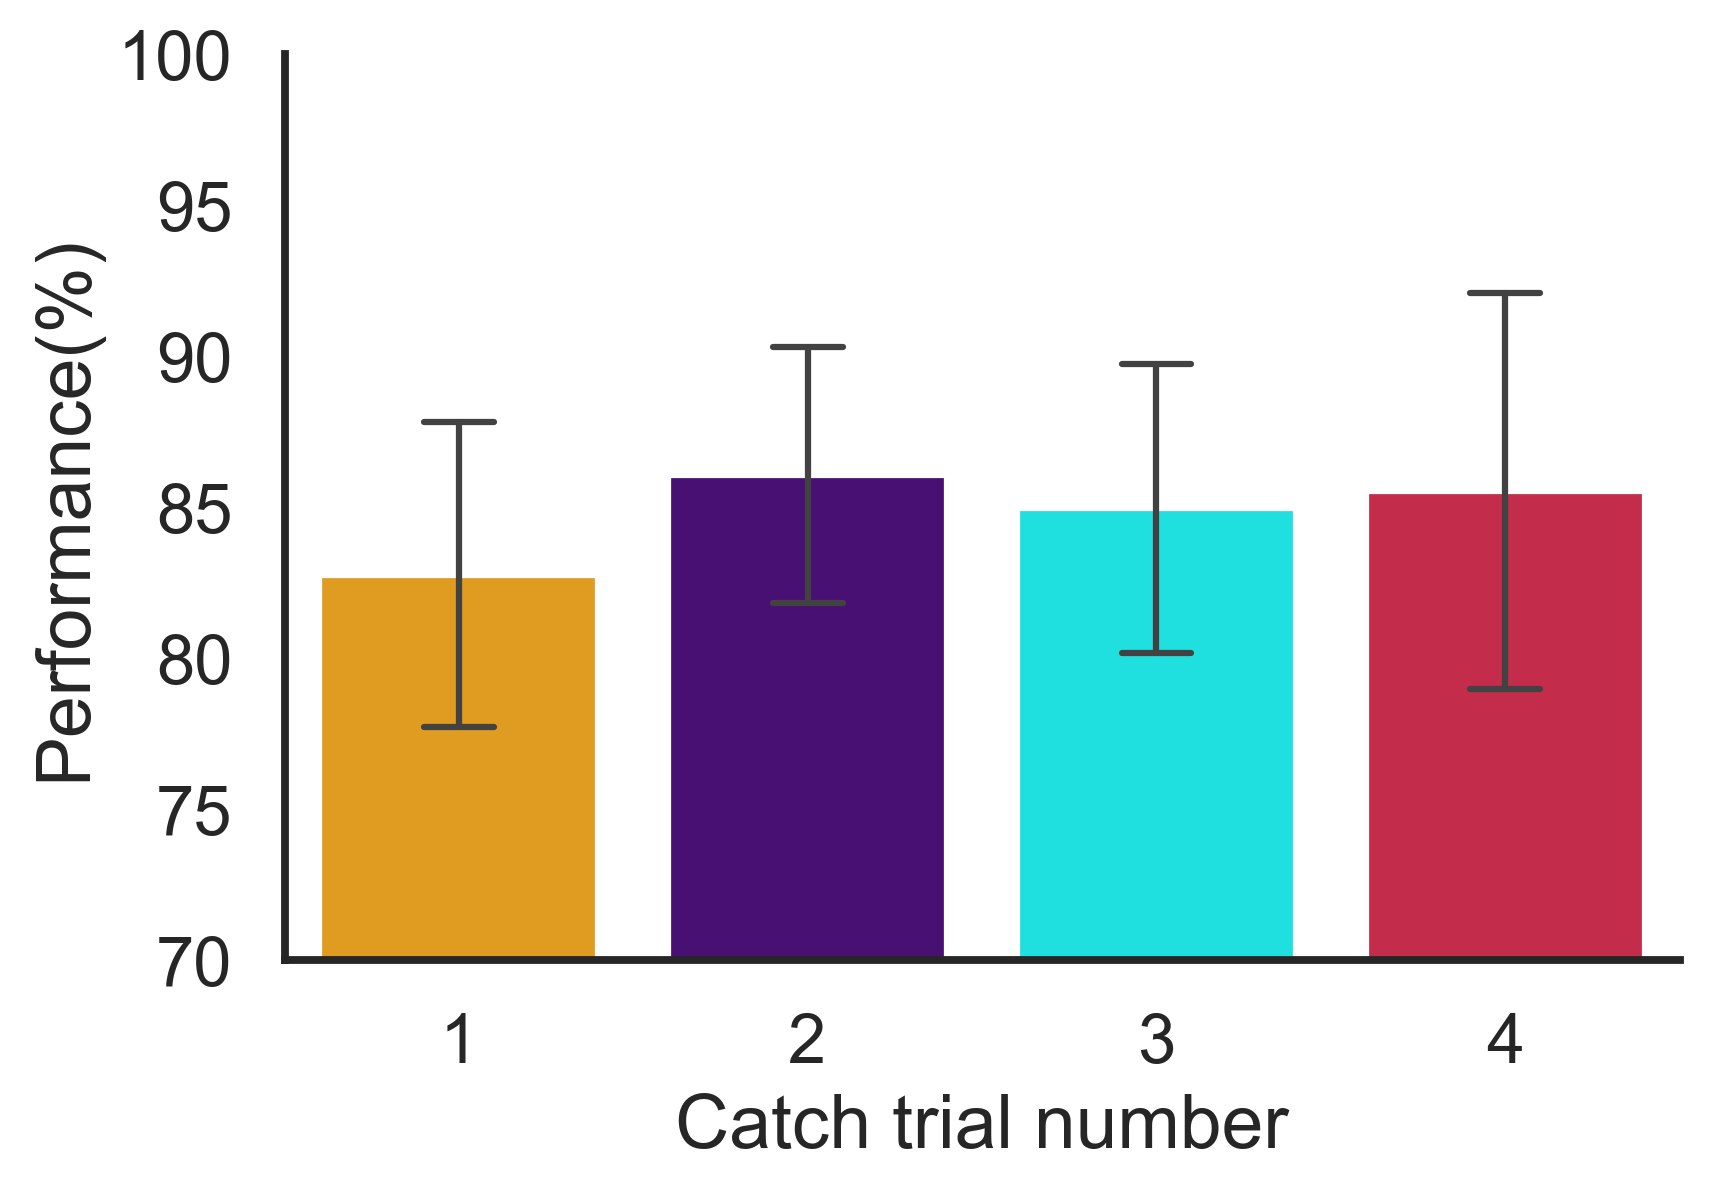

In [20]:
plt.figure(figsize=(6,4), dpi=300)
g=sns.barplot(
    data=catch_sessions, 
    x='catch_nr', y='performance',
    palette=['orange', 'indigo', 'cyan', 'crimson'], 
    ci='sd', estimator=np.mean, errwidth=1.5, capsize=.2
    )
g.set(ylim=(70,100),
      xlabel='Catch trial number', 
      ylabel='Performance(%)',
     xticks=range(0,4,1),
     xticklabels=[1,2,3,4])
#     title='Distribution of catch trials according to performance levels\n')

sns.despine()
plt.savefig('catch_session_performances.svg')

#### Checking normality of performance level distributions across catch trial number

,statistic,p,kurtosis,skewness
1,0.800953,0.009606,1.148699,1.642192
2,0.574883,0.000067,-0.172479,0.109695
3,0.809131,0.011921,-0.838738,0.492972
4,0.806787,0.011202,0.010963,0.999229


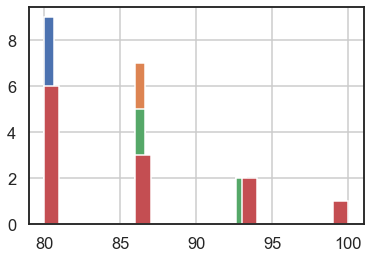

In [150]:
results=pd.DataFrame()
for i in [1,2,3,4]:
    stat, p = shapiro(group)
    group = catch.loc[catch.catch_nr==i, 'performance']
    results.loc[i, 'statistic']=stat
    results.loc[i, 'p']=p
    results.loc[i,'kurtosis']=group.kurt()
    results.loc[i,'skewness']=group.skew()
    group.hist(bins=20)
results

#### Comparing the performance levels across catch trial number

In [ ]:
catch1 = catch.loc[catch.catch_nr==1, 'performance']
catch2 = catch.loc[catch.catch_nr==2, 'performance']
catch3 = catch.loc[catch.catch_nr==3, 'performance']
catch4 = catch.loc[catch.catch_nr==4, 'performance']

In [126]:
friedmanchisquare(catch1, catch2, catch3, catch4)

FriedmanchisquareResult(statistic=2.670731707317098, pvalue=0.4452240700256098)

#### Are the catch session performance levels different for non-match choices?

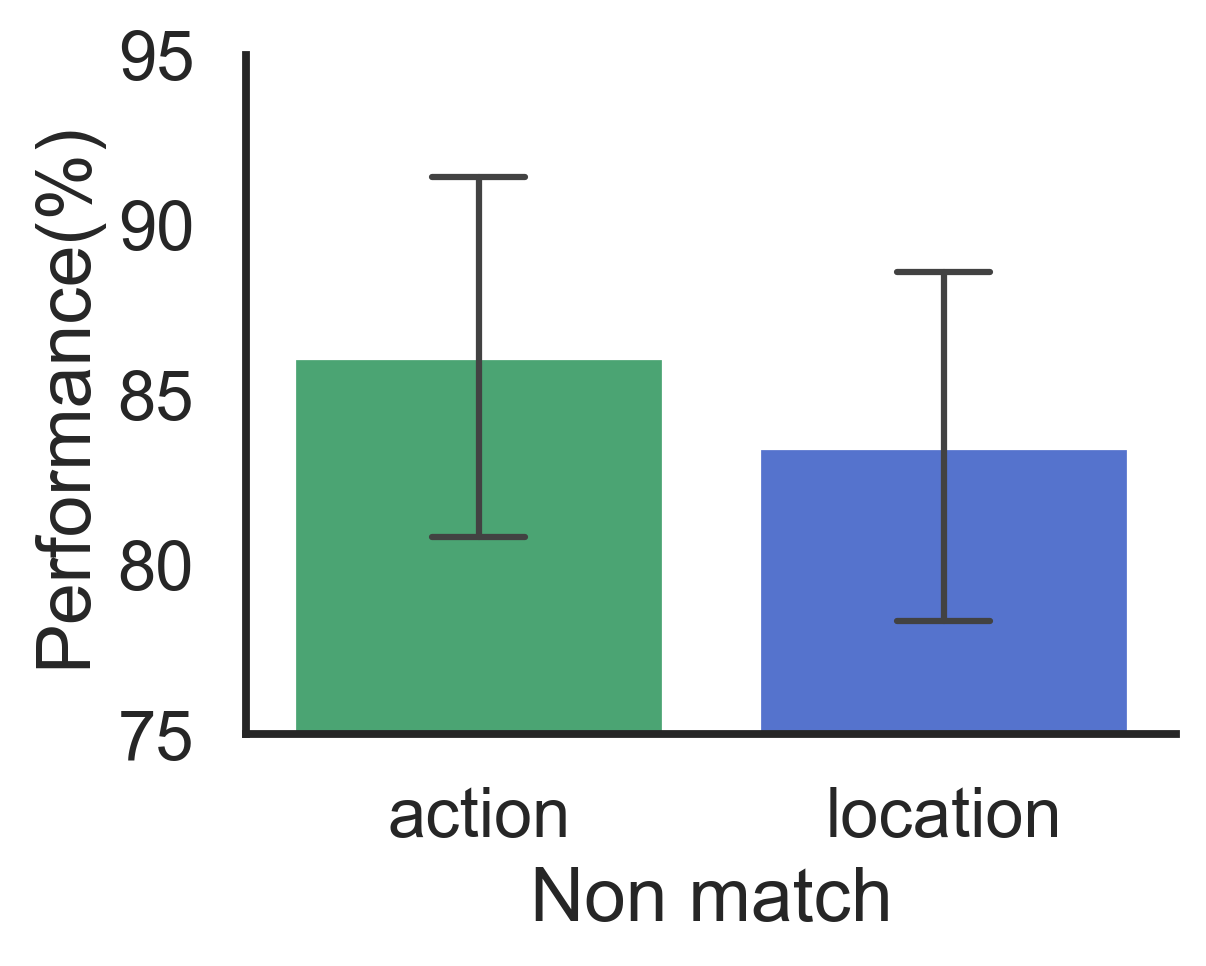

In [30]:
plt.figure(figsize=(4,3), dpi=300)
g=sns.barplot(
    data=catch, 
    y='performance', x='outcome', 
    palette=['mediumseagreen', 'royalblue'], 
    hue_order=['E','A'], 
    ci='sd', estimator=np.mean,
    errwidth=1.5, capsize=.2)
g.set(ylim=(75,95),xlabel='Non match', ylabel='Performance(%)',
     xticklabels=['action', 'location'])

sns.despine()
#plt.savefig('catch_session_performances_split_by_action_vs_location.svg')

,statistic,p,kurtosis,skewness
E,0.800953,0.009606,-0.308822,1.139622
A,0.661086,0.000005,0.296174,0.680374


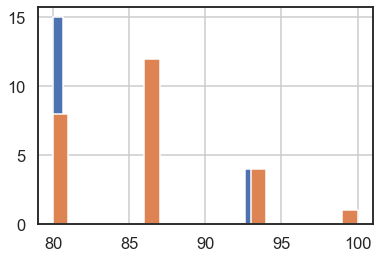

In [151]:
results=pd.DataFrame()
for i in ['E','A']:
    stat, p = shapiro(group)
    group = catch.loc[catch.outcome==i, 'performance']
    results.loc[i, 'statistic']=stat
    results.loc[i, 'p']=p
    results.loc[i,'kurtosis']=group.kurt()
    results.loc[i,'skewness']=group.skew()
    group.hist(bins=20)
results

In [28]:
e= catch.loc[catch.outcome=='E', 'performance']
a= catch.loc[catch.outcome=='A', 'performance']
print(a,e)
mannwhitneyu(e,a)

5       86.6
7       86.6
15      80.0
34      80.0
35      86.6
37     100.0
53      93.3
55      86.6
58      80.0
66      80.0
75      86.6
80      93.3
90      86.6
99      80.0
100     86.6
101     86.6
116     80.0
117     93.3
119     80.0
121     86.6
126     86.6
127     86.6
133     80.0
135     86.6
139     93.3
Name: performance, dtype: float64 2      80.0
8      80.0
17     93.3
20     80.0
22     80.0
25     80.0
43     80.0
44     80.0
48     93.3
50     86.6
54     86.6
56     80.0
65     80.0
67     80.0
72     93.3
81     86.6
82     80.0
95     80.0
96     80.0
109    86.6
118    80.0
128    93.3
137    80.0
Name: performance, dtype: float64


MannwhitneyuResult(statistic=204.0, pvalue=0.03148733581307476)

#### Distribution of catch trial outcomes across sessions

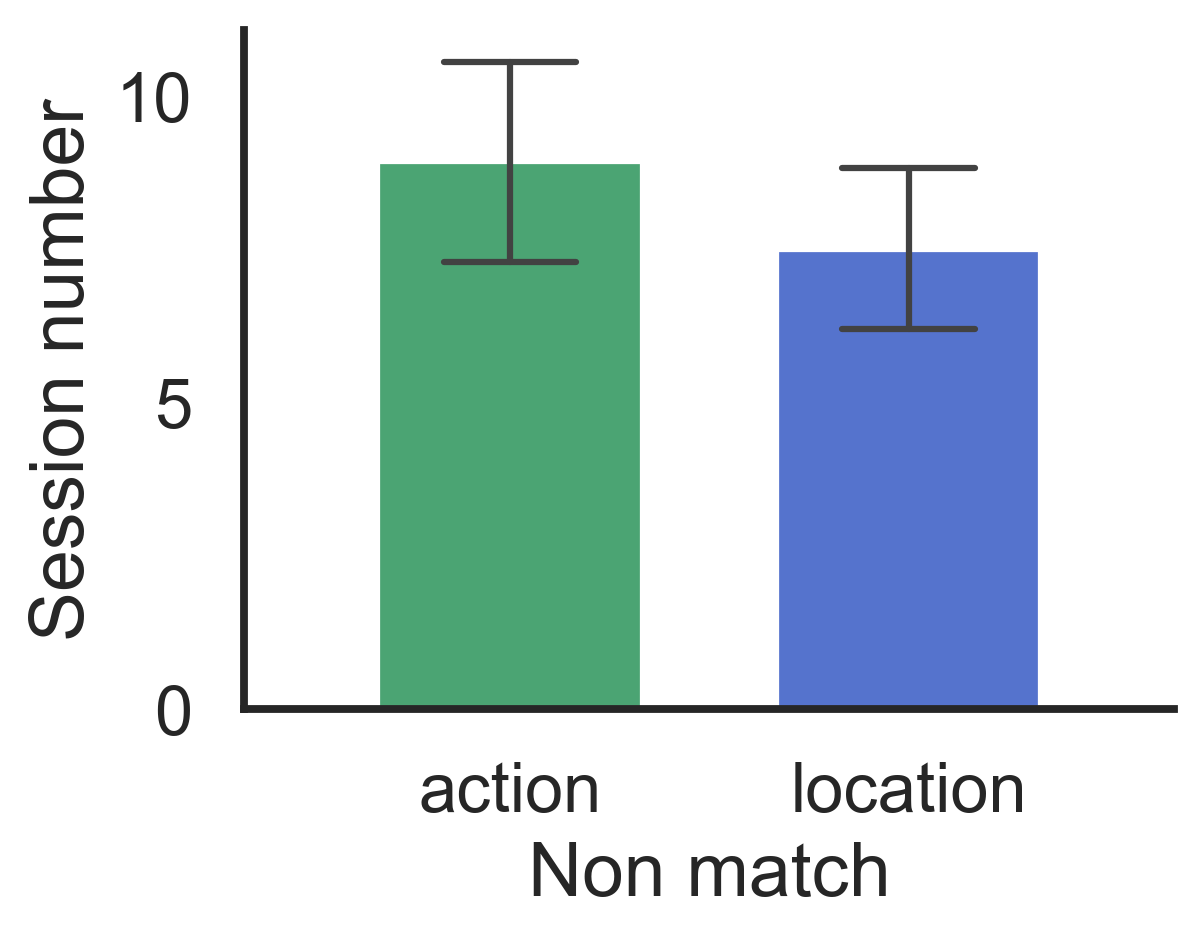

In [22]:
sns.set(context='talk', style='white')
plt.figure(figsize=(4,3), dpi=300)
g=sns.barplot(
    data=catch, 
    y='session_nr', 
    x='outcome',
    hue='outcome',
    order=['E','A'],
    palette=['royalblue','mediumseagreen'],
    errwidth=1.5, capsize=.2) #hue_order=['E','A'])

g.set(
    xlim=[-.2,1.2],
    ylabel='Session number', 
    xlabel='Non match',
    xticks=[.2,.8], xticklabels=['action', 'location'])
#     title='Distribution of catch trial outcomes across sessions\n')
g.legend_.remove()
sns.despine()
plt.savefig('catch_session_nr_split_by_action_vs_location.svg')

,statistic,p,kurtosis,skewness
E,0.835203,0.000934,-0.882843,-0.291705
A,0.948625,0.273964,-0.495610,0.304111


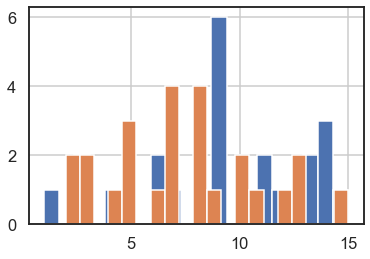

In [154]:
results=pd.DataFrame()
for i in ['E','A']:
    stat, p = shapiro(group)
    group = catch.loc[catch.outcome==i, 'session_nr']
    results.loc[i, 'statistic']=stat
    results.loc[i, 'p']=p
    results.loc[i,'kurtosis']=group.kurt()
    results.loc[i,'skewness']=group.skew()
    group.hist(bins=20)
results

In [155]:
e= catch.loc[catch.outcome=='E', 'session_nr']
a= catch.loc[catch.outcome=='A', 'session_nr']
mannwhitneyu(e,a)

MannwhitneyuResult(statistic=220.0, pvalue=0.08260879957618122)